In [1]:
import warnings
warnings.filterwarnings('ignore')
import glob
import os
import joblib
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
import random

# 1. 문제 정의

# 2. 데이터 수집

## (1) 데이콘 기본 데이터

In [2]:
train = pd.read_csv('data/train.csv').drop(['index'], axis=1).fillna('NAN')
test = pd.read_csv('data/test.csv').drop(['index'], axis=1).fillna('NAN')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NAN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NAN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


# 3. 데이터 전처리

In [4]:
object_col = []
for col in train.columns:
    if train[col].dtype == 'O':
        object_col.append(col)

In [5]:
enc = OneHotEncoder()
enc.fit(train.loc[:,object_col])

train_onehot_df = pd.DataFrame(enc.transform(train.loc[:, object_col]).toarray(), 
                               columns=enc.get_feature_names(object_col))
train.drop(object_col, axis=1, inplace=True)
train = pd.concat([train, train_onehot_df], axis=1)

In [6]:
test_onehot_df = pd.DataFrame(enc.transform(test.loc[:, object_col]).toarray(),
                              columns=enc.get_feature_names(object_col))
test.drop(object_col, axis=1, inplace=True)
test = pd.concat([test, test_onehot_df], axis=1)

# 4. 탐색적 데이터 분석

# 5. 변수 조정

# 6. 모델 학습

## (1) Lightgbm

### Parameter Tuning

100%|█████████████████████████████████████████████| 50/50 [3:38:29<00:00, 262.19s/trial, best loss: 0.7149096429168147]
46
{'state': 2, 'tid': 46, 'spec': None, 'result': {'loss': 0.7149096429168147, 'score': 0.1890994390994391, 'params': {'bagging_fraction': 0.7100551101181825, 'boosting_type': 'dart', 'class_weight': None, 'colsample_bytree': None, 'feature_fraction': 0.5240458676583206, 'lambda_l1': 0, 'lambda_l2': 0, 'learning_rate': 0.027172404160857474, 'min_child_samples': None, 'min_child_weight': 0.016175471630220366, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': None, 'num_class': 3, 'num_leaves': 109, 'objective': 'multiclass', 'reg_alpha': None, 'reg_lambda': None, 'subsample': None, 'subsample_for_bin': 180000, 'verbose': -1, 'n_estimators': 2000}, 'status': 'ok'}, 'misc': {'tid': 46, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'bagging_fraction': [46], 'boosting_type': [46], 'class_weight': [46], 'feature_fraction': [46], 'lambda_l1': [4

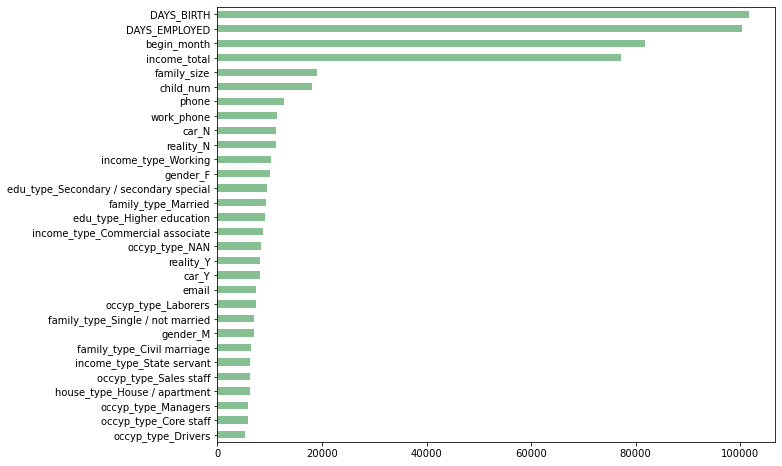

-------------------- 1 --------------------
accuracy score  0.18631897203325776


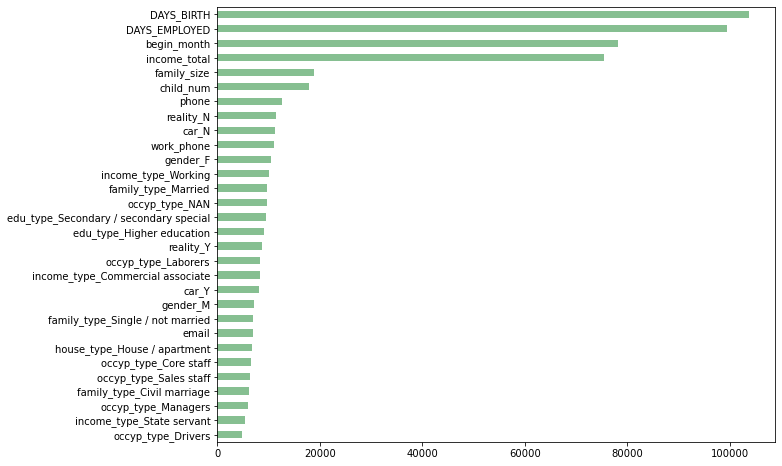

-------------------- 2 --------------------
accuracy score  0.19674919674919675


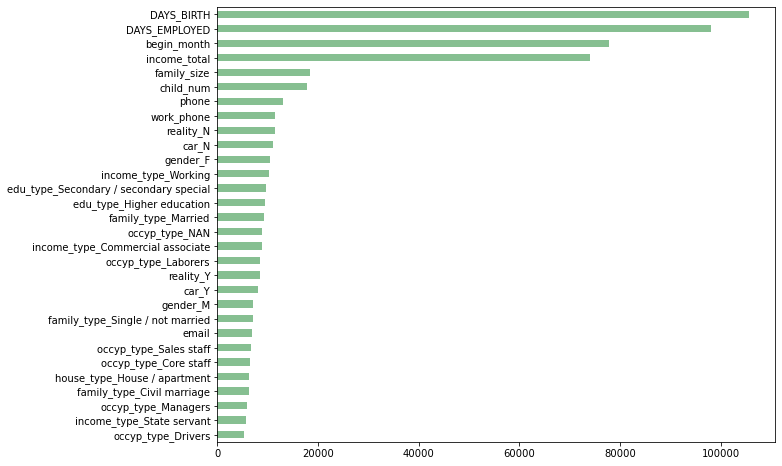

-------------------- 3 --------------------
accuracy score  0.1855981855981856


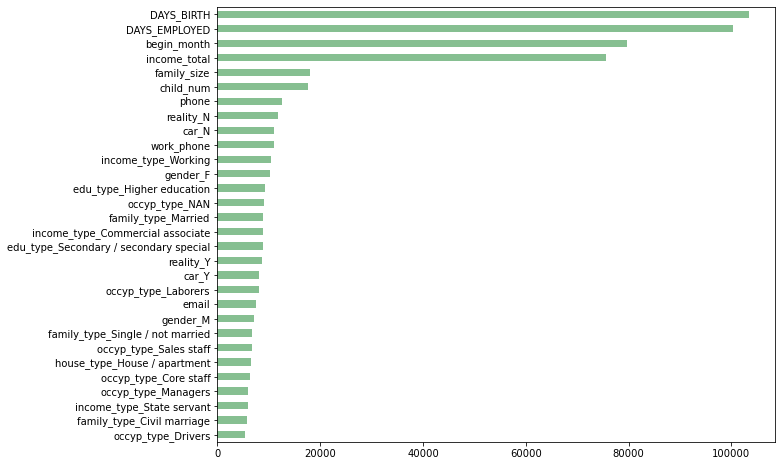

-------------------- 4 --------------------
accuracy score  0.1888111888111888


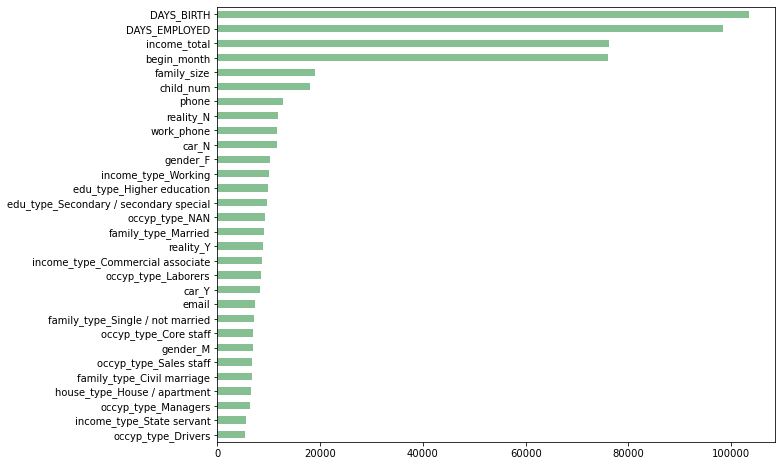

acc_score: 0.1888111888111888
sub_preds: [[0.05135743 0.10073482 0.84790774]
 [0.25800516 0.22741011 0.51458473]
 [0.074538   0.13571759 0.78974442]
 [0.11956342 0.10808511 0.77235147]
 [0.05486335 0.13973634 0.80540031]]
Avg Accuracy 0.1890994390994391


In [17]:
predictions, oof_predictions, _, misclassified_indices = classify_multi(X_cols, df_train, df_test, y)

In [26]:
params = {'bagging_fraction': 0.7100551101181825, 'boosting_type': 'dart', 'class_weight': None, 'colsample_bytree': None, 
 'feature_fraction': 0.5240458676583206, 'lambda_l1': 0, 'lambda_l2': 0, 'learning_rate': 0.027172404160857474, 
 'min_child_samples': None, 'min_child_weight': 0.016175471630220366, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': None, 
 'num_class': 3, 'num_leaves': 109, 'objective': 'multiclass', 'reg_alpha': None, 'reg_lambda': None, 'subsample': None, 
 'subsample_for_bin': 180000, 'verbose': -1, 'n_estimators': 3000}

In [23]:
params = {
    'learning_rate' : 0.06,
    'num_leaves' : 400,
    'n_estimators' : 300,
    'max_depth': -1,
    'min_child_weight' : 3, 
    'subsample' : 0.8,
    'colsample_bytree' : 0.5,
    'objective' : 'multiclass',
    'n_jobs': -1
}

In [82]:
p = train[['credit']]
p['0'] = p['credit'][p['credit']==0.0]
p['1'] = p['credit'][p['credit']==1.0]
p['2'] = p['credit'][p['credit']==2.0]
del p['credit']
p = p.replace([0.0, 2.0], [1.0, 1.0])
p = p.fillna(0)
p

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
26452,0.0,1.0,0.0
26453,0.0,0.0,1.0
26454,0.0,0.0,1.0
26455,0.0,0.0,1.0


In [171]:
params = {
    'learning_rate' : 0.001,
    'num_leaves' : 400,
    'n_estimators' : 10000,
    'max_depth': -1,
    'min_child_weight' : 2, # fix
    'colsample_bytree' : 0.4, # fix
    'objective' : 'multiclass',
    'n_jobs': -1
}

In [2]:
lucky_seeds=[42,2019,91373]
scores = []

for seed in lucky_seeds:

    kfold = KFold(n_splits=4, random_state = seed, shuffle = True)

    # dacon code
    cv=np.zeros((train.shape[0], 3))

    for n, (train_idx, val_idx) in enumerate(kfold.split(train)):

        x_train, x_val = train.drop(['credit'], axis=1).iloc[train_idx], train.drop(['credit'], axis=1).iloc[val_idx]
        y_train, y_val = train['credit'].iloc[train_idx], train['credit'].iloc[val_idx]

        model = LGBMClassifier(**params, random_state=seed)

        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=30, verbose=-1) 
        #joblib.dump(model, f'./pred_pkl/{n}_fold_model_{seed}.pkl')

        # CROSS-VALIDATION , EVALUATE CV
        cv[val_idx,:] = model.predict_proba(x_val)
        
    scores.append(log_loss(p.values, cv))

NameError: name 'KFold' is not defined

In [173]:
print(np.mean(scores))

0.714376845711752


In [80]:
# MODEL LOAD & TEST PREDICT
# 12 MODELS 평균 사용
models = os.listdir('./pred_pkl/')
models_list = [x for x in models if x.endswith(".pkl")]
assert len(models_list) ==12
temp_predictions = np.zeros((test.shape[0], 3))

for m in models_list:
    model = joblib.load('./pred_pkl/'+m)
    predict_proba = model.predict_proba(test)
    temp_predictions += predict_proba/12

In [82]:
temp_predictions.shape

(10000, 3)

# 결과 제출

In [84]:
submission = sample_submission.copy()

In [89]:
submission.to_csv('submission/seed.csv', index=False)